In [1]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [3]:
dataframe=pd.read_csv('/content/csv_result-bone-marrow.csv')

In [4]:
dataframe.head(5)

,id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,1,22.830137,0,1,0,1,1,1,...,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,2,1,0,23.342466,0,1,0,-1,-1,1,...,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,3,1,0,26.394521,0,1,0,-1,-1,1,...,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,4,0,0,39.684932,1,1,0,1,2,1,...,?,4.25,29.481647,0.14,50,23,29,19,53,1
4,5,0,1,33.358904,0,0,0,1,2,0,...,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0


In [5]:
len(dataframe)

187

In [6]:
column_list=list(dataframe.columns)
for i in range (dataframe.shape[1]):
    dataframe[column_list[i]] = dataframe[column_list[i]].apply(lambda x: np.nan if x == '?' else x) 

In [7]:
print(dataframe.survival_time.isnull().sum())
print(dataframe.Rbodymass.isnull().sum())

0
2


In [8]:
#there are several data points are outlier here
#so imputation method will be median

dataframe['Rbodymass']=dataframe['Rbodymass'].fillna(dataframe['Rbodymass'].astype(float).mean())

In [9]:
# As our sample is only 187 we can not take 100 and 200 random samples as stated in project final
#But we will maintain the ratio of 1:2
#for test1 we will take 63 samples
#for test2 we will take 126 samples

###Variable 'Survival Time'

####Task 1

In [10]:
#taking 63 samples
df_test1=dataframe.sample(n=63, random_state=1)
df_test1.to_csv('test1_data.csv')

In [11]:
data1 = df_test1.survival_time
df_test1['survival_time']

16       58
172      31
127    1301
40     1376
106      68
       ... 
28     1041
44     1327
91      136
33     1084
51     2926
Name: survival_time, Length: 63, dtype: int64

In [12]:
#finding mean and proportion
proportion=df_test1['survival_status'].sum()/len(df_test1['survival_status'])
print('Proportion:', proportion)
print('No of successess',proportion*len(df_test1['survival_status']))

mean = data1.mean()
print('Mean of 63 random samples:', mean)

Proportion: 0.38095238095238093
No of successess 24.0
Mean of 63 random samples: 999.2380952380952


In [46]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_test1['survival_status'], value=0.38095)

(3.860549980695205e-05, 0.9999691972677496)

In [41]:
#hypothesis testing for proportion
from statsmodels.stats.proportion import proportions_ztest
zstat,pval = proportions_ztest(count=24, nobs=63, value= 0.5)
print('Test Statistic z: ',zstat,'\nP-Value: ',pval)

Test Statistic z:  -1.9457794562353912 
P-Value:  0.051681237403116684


In [14]:
#hypothesis testing for mean
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(df_test1['survival_time'], 1000, alternative='greater')
print('Test Statistic t: ',tstat,'\nP-Value: ',pval)

Test Statistic t:  -0.007300771595359617 
P-Value:  0.502900840136494


In [15]:
#finding Confidence interval (as this variable has not showed a normal
#distribution, we will perform t distribution to find confidence interval
print('90% confidence interval  for proportion: ',st.t.interval(alpha=0.90, df=len(data1)-1, loc=np.mean(df_test1['survival_status']), scale=st.sem(df_test1['survival_status'])) )
print('90% confidence interval for mean: ',st.t.interval(alpha=0.90, df=len(data1)-1, loc=np.mean(data1), scale=st.sem(data1)) )

90% confidence interval  for proportion:  (0.27796901806959384, 0.483935743835168)
90% confidence interval for mean:  (824.9781932421417, 1173.4979972340486)


####Task 2

In [16]:
#taking 126 samples
df_test2=dataframe.sample(n=126, random_state=1)
df_test2.to_csv('test2_data.csv')

In [17]:
data2 = df_test2.survival_time
df_test2['survival_time']

16       58
172      31
127    1301
40     1376
106      68
       ... 
173    1243
186    1109
27       35
100    2286
23      149
Name: survival_time, Length: 126, dtype: int64

In [18]:
#finding mean and proportion
proportion=df_test2['survival_status'].sum()/len(df_test2['survival_status'])
print('Proportion:', proportion)
print('No of successess',proportion*len(df_test2['survival_status']))

mean = data2.mean()
print('Mean of 126 random samples:', mean)

Proportion: 0.4365079365079365
No of successess 55.0
Mean of 126 random samples: 955.436507936508


In [19]:
# compare two sample proportions using hypothesis test 
import pingouin as pg
res = pg.ttest(df_test1['survival_status'], df_test2['survival_status'], paired=False)

# test statistic, P-value, Confidence Interval
print('Hypothesis testing proportion two samples results:\n\n',res)

Hypothesis testing proportion two samples results:

                T         dof alternative     p-val          CI95%   cohen-d  \
T-test -0.731284  126.014177   two-sided  0.465963  [-0.21, 0.09]  0.112197   

         BF10     power  
T-test  0.214  0.111768  


In [20]:
# compare two sample means using hypothesis test
res = pg.ttest(df_test1['survival_time'], df_test2['survival_time'], paired=False)

# test statistics, P-value, Confidence Interval
print('Hypothesis testing mean two samples results:\n',res)

Hypothesis testing mean two samples results:
                T         dof alternative    p-val              CI95%  \
T-test  0.344865  122.013921   two-sided  0.73079  [-207.63, 295.23]   

         cohen-d   BF10     power  
T-test  0.053556  0.176  0.063768  


####Task 3

In [62]:
#finding correlation
r, p = st.pearsonr(dataframe['survival_time'],dataframe['survival_status'])
print('Correlation between survival_time and survival_status:\n(r,p) = ',r,p)

Correlation between survival_time and survival_status:
(r,p) =  -0.7614615378274371 1.1268686471213073e-36


In [63]:
#getting confidence interval for correlation
r_z = np.arctanh(r)
se = 1/np.sqrt(dataframe['survival_time'].size-3)
alpha = 0.05
z = st.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se
lo, hi = np.tanh((lo_z, hi_z))
print('Confidence Interval:',(lo,hi))

Confidence Interval: (-0.8158150882563996, -0.6937731212672271)


####Task 4

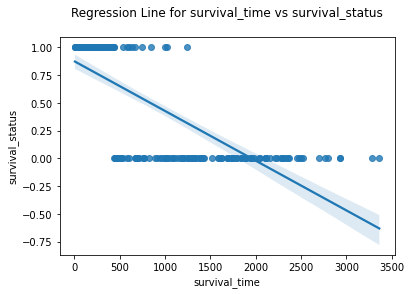

In [23]:
# plotting Regression Line
import seaborn as sns
import matplotlib.pyplot as plt
X=dataframe['survival_time']
y=dataframe['survival_status']
sns.regplot(x=X, y=y, data=dataframe, ci=95)

plt.title('Regression Line for survival_time vs survival_status\n')
plt.show()

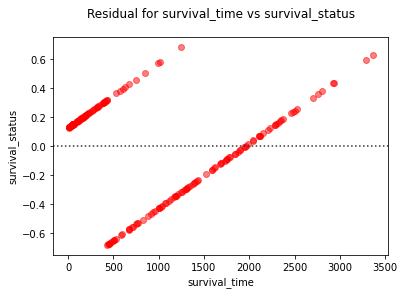

In [24]:
# plotting Residual
sns.residplot(x=X, y=y, order=1,
   data=dataframe, scatter_kws={'color': 'r',
   'alpha': 0.5})
plt.title('Residual for survival_time vs survival_status\n')
plt.show()

###Rbodymass

####Task 1

In [25]:
#taking 63 samples
df_test1=dataframe.sample(n=63, random_state=1)
df_test1.to_csv('test1_data.csv')

In [26]:
data1 = df_test1.Rbodymass.astype(float)
df_test1['Rbodymass']

16     97.8
172    11.2
127      12
40       48
106    55.2
       ... 
28     14.3
44     41.4
91       70
33     49.6
51     28.5
Name: Rbodymass, Length: 63, dtype: object

In [27]:
#finding mean and proportion
proportion=df_test1['survival_status'].sum()/len(df_test1['survival_status'])
print('Proportion:', proportion)
print('No of successess',proportion*len(df_test1['survival_status']))

mean = data1.mean()
print('Mean of 63 random samples:', mean)

Proportion: 0.38095238095238093
No of successess 24.0
Mean of 63 random samples: 37.01190476190476


In [28]:
#hypothesis testing for mean
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(data1, 30, alternative='greater')
print('Test Statistic t: ',tstat,'\nP-Value: ',pval)

Test Statistic t:  2.8432525495642262 
P-Value:  0.003019886289794049


In [29]:
#finding Confidence interval (as this variable has not showed a normal
#distribution, we will perform t distribution to find confidence interval
print('90% confidence interval  for proportion: ',st.t.interval(alpha=0.90, df=len(data1)-1, loc=np.mean(df_test1['survival_status']), scale=st.sem(df_test1['survival_status'])) )
print('90% confidence interval for mean: ',st.t.interval(alpha=0.90, df=len(data1)-1, loc=np.mean(data1), scale=st.sem(data1)) )

90% confidence interval  for proportion:  (0.27796901806959384, 0.483935743835168)
90% confidence interval for mean:  (32.893906957295414, 41.129902566514104)


####Task 2

In [30]:
#taking 126 samples
df_test2=dataframe.sample(n=126, random_state=1)
df_test2.to_csv('test2_data.csv')

In [31]:
data2 = df_test2.Rbodymass.astype(float)
df_test2['Rbodymass']

16     97.8
172    11.2
127      12
40       48
106    55.2
       ... 
173    50.8
186      37
27       17
100      33
23     39.3
Name: Rbodymass, Length: 126, dtype: object

In [32]:
#finding mean and proportion
proportion=df_test2['survival_status'].sum()/len(df_test2['survival_status'])
print('Proportion:', proportion)
print('No of successess',proportion*len(df_test2['survival_status']))

mean = data2.mean()
print('Mean of 126 random samples:', mean)

Proportion: 0.4365079365079365
No of successess 55.0
Mean of 126 random samples: 36.484144144144146


In [33]:
# compare two sample proportions using hypothesis test 
import pingouin as pg
res = pg.ttest(df_test1['survival_status'], df_test2['survival_status'], paired=False)

# test statistic, P-value, Confidence Interval
print('Hypothesis testing proportion two samples results:\n\n',res)

Hypothesis testing proportion two samples results:

                T         dof alternative     p-val          CI95%   cohen-d  \
T-test -0.731284  126.014177   two-sided  0.465963  [-0.21, 0.09]  0.112197   

         BF10     power  
T-test  0.214  0.111768  


In [34]:
# compare two sample means using hypothesis test
res = pg.ttest(df_test1['Rbodymass'].astype(float), df_test2['Rbodymass'].astype(float), paired=False)

# test statistics, P-value, Confidence Interval
print('Hypothesis testing mean two samples results:\n',res)

Hypothesis testing mean two samples results:
                T        dof alternative     p-val          CI95%   cohen-d  \
T-test  0.175564  122.52947   two-sided  0.860926  [-5.42, 6.48]  0.027221   

         BF10     power  
T-test  0.169  0.053536  


In [35]:
#finding Confidence interval (as this variable has not showed a normal
#distribution, we will perform t distribution to find confidence interval
print('95% confidence interval  for proportion: ',st.t.interval(alpha=0.95, df=len(data2)-1, loc=np.mean(df_test2['survival_status']), scale=st.sem(df_test2['survival_status'])) )
print('95% confidence interval for mean: ',st.t.interval(alpha=0.95, df=len(data2)-1, loc=np.mean(data2), scale=st.sem(data2)) )

95% confidence interval  for proportion:  (0.3487153191487252, 0.5243005538671478)
95% confidence interval for mean:  (33.082207636688715, 39.88608065159958)


####Task 3

In [59]:
data3 = dataframe['Rbodymass'].astype(float)

In [60]:
#finding correlation
r, p = st.pearsonr(data3,dataframe['survival_status'])
print('Correlation between Rbodymass and survival_status:\n(r,p) = ',r,p)

Correlation between Rbodymass and survival_status:
(r,p) =  0.23655997990356945 0.0011156578031756566


In [61]:
#getting confidence interval for correlation
r_z = np.arctanh(r)
se = 1/np.sqrt(dataframe['Rbodymass'].size-3)
alpha = 0.05
z = st.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se
lo, hi = np.tanh((lo_z, hi_z))
print('Confidence Interval:',(lo,hi))

Confidence Interval: (0.09633685563633537, 0.3675759574875193)


####Task 4

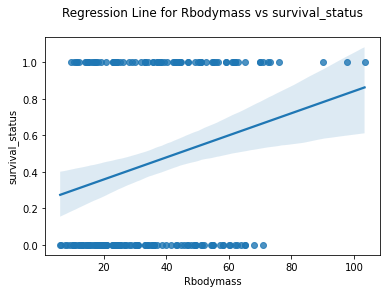

In [39]:
# plotting Regression Line
import seaborn as sns
import matplotlib.pyplot as plt

X=dataframe['Rbodymass'].astype(float)
y=dataframe['survival_status']
sns.regplot(x=X, y=y, data=dataframe, ci=95)
plt.title('Regression Line for Rbodymass vs survival_status\n')
plt.show()

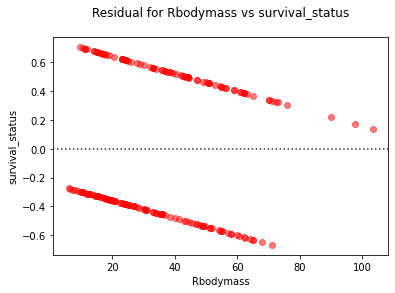

In [40]:
# plotting Residual
sns.residplot(x=X, y=y, order=1,
   data=dataframe, scatter_kws={'color': 'r',
   'alpha': 0.5})
plt.title('Residual for Rbodymass vs survival_status\n')
plt.show()